<a href="https://colab.research.google.com/github/Nikkiie/Covid-tweet-sentiment-analysis-Classification/blob/main/Covid_19_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - Sentiment Analysis : Predicting sentiment of COVID-19 tweets**

# **PROBLEM DESCRIPTION**

**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**

**The names and usernames have been given codes to avoid any privacy concerns.**

**The features present in the data are --**



1- Username

2- ScreenName

3- Location

4- TweetAt

5- OriginalTweet

6- Sentiment

# **IMPORTING LIBRARIES**

In [61]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, ImageColorGenerator

# **Loading the dataset**

In [3]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Giving the file path

file_path = ('/content/drive/MyDrive/Cap-3/Coronavirus Tweets.csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

**Dataset First view**

In [ ]:
# Checking top 5 rows in dataframe
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Checking last 5 rows in dataframe
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Dataset Rows & Columns count**

In [5]:
# Data shape
df.shape

(41157, 6)

In [6]:
#Check all the coloumns present in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Dataset Information**

In [7]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**Duplicate Values**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


**Checking Unique Value**

In [ ]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


# **Null Value Analysis-**

In [8]:
# Checking null value
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
# Importing missingo
import missingno as msno

In [10]:
# 1-step make the list of features which has missing values
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
# 2-step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4)*100,  " % missing values")

Location 20.87  % missing values


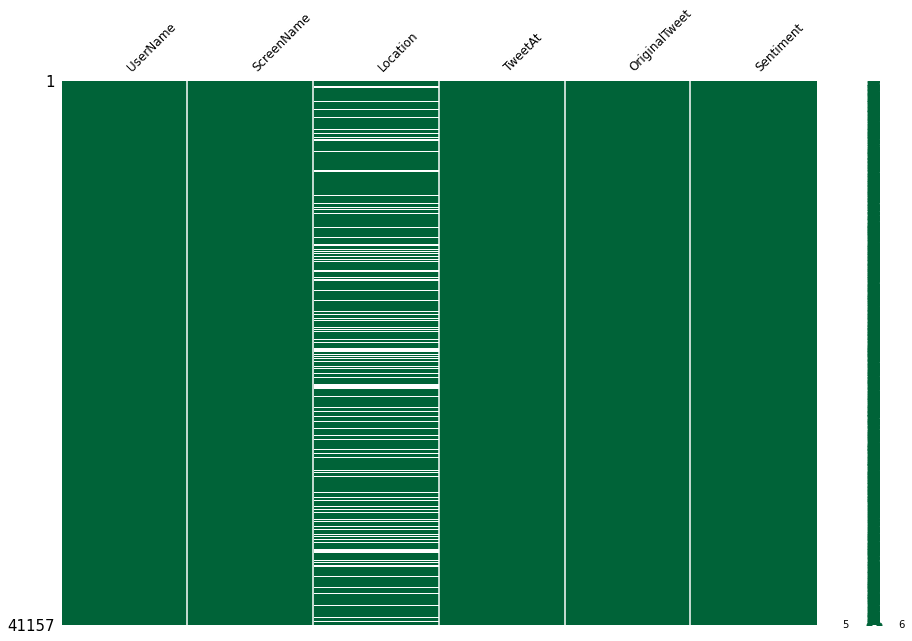

In [11]:
msno.matrix(df, figsize=(15,10), fontsize=12, color=(0, 0.39, 0.22));

# **Exploratory Data Analysis**

**When did the Tweets Started ?**

In [ ]:
# Count value of TweetAt 
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# Describing TweetAt
df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

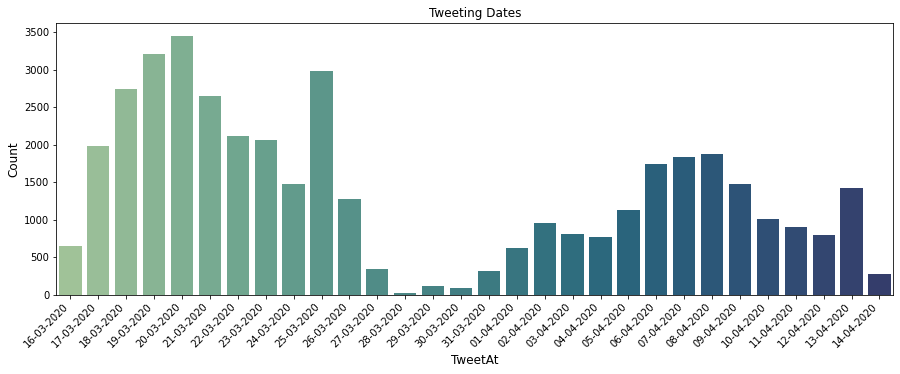

In [12]:
# Distribution of Tweets Date
plt.figure(figsize=(15,5))
sns.countplot(x='TweetAt', data=df, palette ="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()

* The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from mid-month of March 2020 to mid-month of April 2020.

* We can see that the date 20-03-2020 has the maximum count value among all the other occuring dates.

* The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total

* Least count value is for date 28-03-2020.



**Origins of Tweets and Top Tweeter Locations-**

In [ ]:
# Looking the count value of different Location 
df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [ ]:
# Describing the Location 
df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

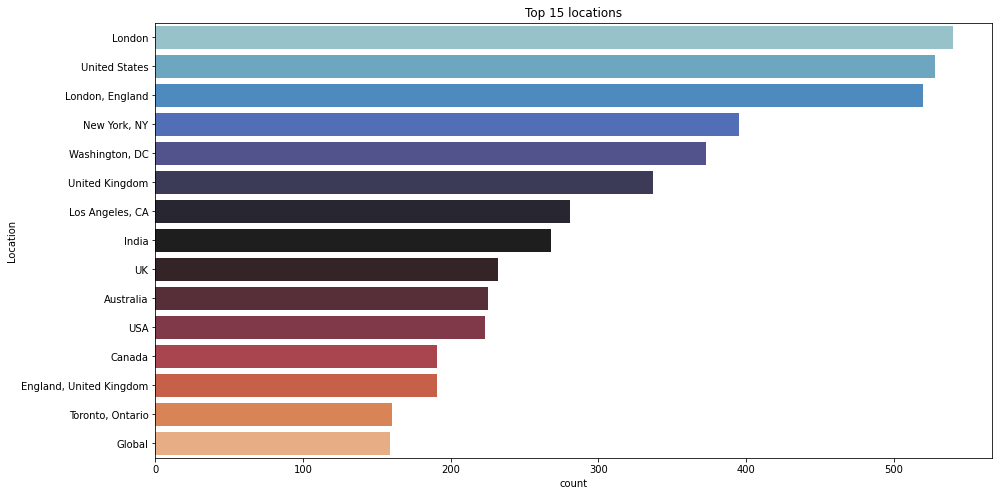

In [13]:
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(15,8))
sns.countplot(y = df.Location, order = df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

* The above count plot shows the top 15 locations in the dataset.

* London being the most tweeting locatioin from the bunch.

* We can see some peculiarity in the dataset i.e. "London" and "London, England" are represented as two different locations. This can be ignored as this wont be helping in the Sentiment Analysis process.

* Second place is of United States and India ranks at 8th place.

# **Sentiment Analysis-**

In [14]:
# Describing the sentiments
df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [15]:
# Checking unique values in Sentiment
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [16]:
# Data has 5 classes of Sentiments, hence we are converting them into 3
def conversion(x):

  if x == 'Extremely Positive':
    return "Positive"
  if x == 'Positive':
    return "Positive"   
  elif x == "'Extremely Negative":
    return "Negative"  
  elif x == "Negative":  
    return "Negative"  
  else:
    return "Neutral" 

df["Sentiment"] = df["Sentiment"].apply(lambda x : conversion(x))    

df.Sentiment.value_counts()

Positive    18046
Neutral     13194
Negative     9917
Name: Sentiment, dtype: int64

In [17]:
analysis = df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis

,Sentiment,OriginalTweet
2,Positive,18046
1,Neutral,13194
0,Negative,9917


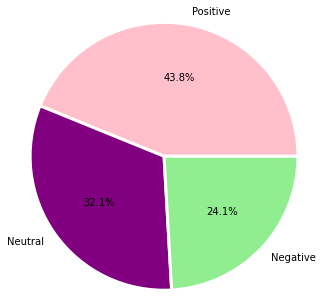

In [18]:
# plot on Sentiment categorical variable
percent_class = analysis['OriginalTweet']
labels= analysis.Sentiment
plt.figure(figsize=(5,6))
colors = ['pink', 'purple','lightgreen']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2,wedgeprops= {"edgecolor":"white",
                     'linewidth': 3,
                     'antialiased': True})

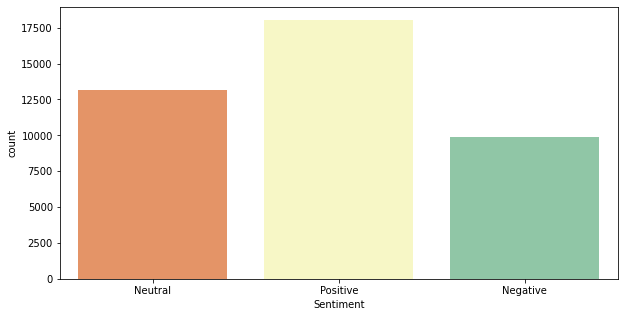

In [19]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Sentiment', data = df, palette='Spectral')


**Number of characters of each sentiments types**

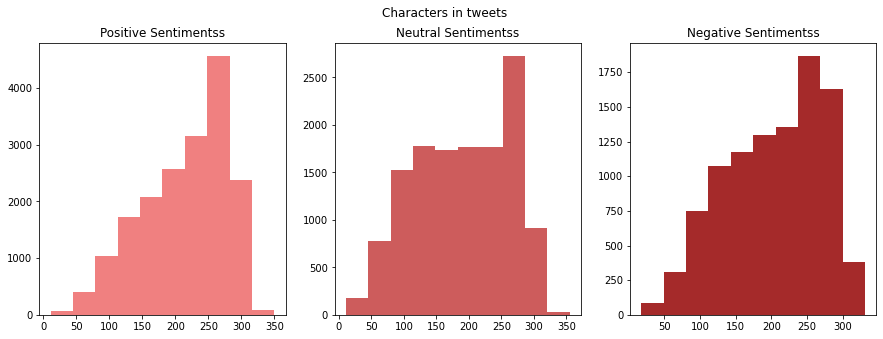

In [20]:
# Histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= df[df['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='lightcoral')
ax1.set_title('Positive Sentimentss')

# Histogram for Neutral Sentiments
tweet_len=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='indianred')
ax2.set_title('Neutral Sentimentss')

# Histogram for Negative Sentiments
tweet_len=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='brown')
ax3.set_title('Negative Sentimentss')



fig.suptitle('Characters in tweets')
plt.show()

**Times between different tweeting date and sentiments associated with the particular date**

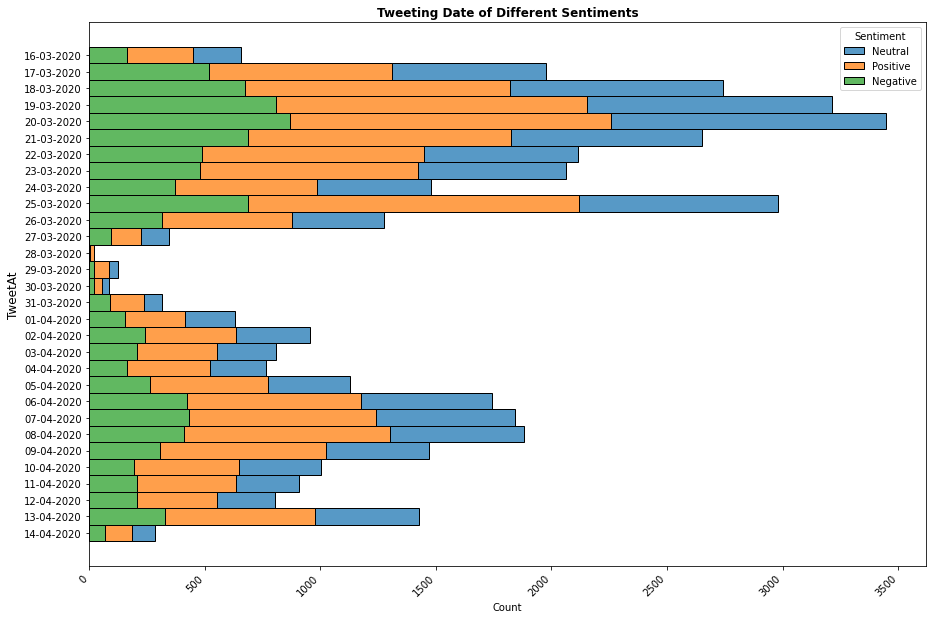

In [21]:
# Plotting Tweet date with different sentiments
plt.figure(figsize=(15,10))
sns.histplot(data = df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

**Punctuations**

In [22]:
# Dwonloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from collections import defaultdict
dic=defaultdict(int)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Function to create a corpus 
def create_corpus(target):
    corpus=[] 
    for x in df[df['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 27 artists>

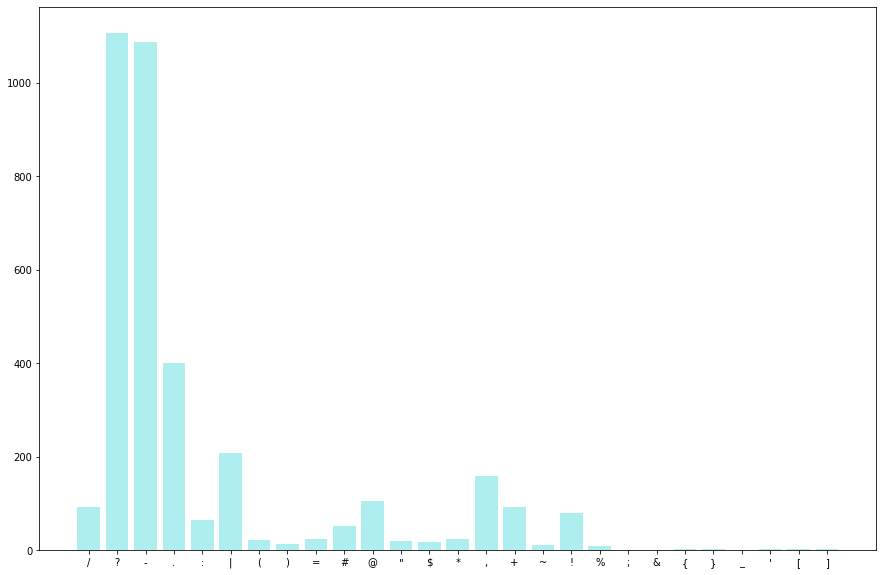

In [24]:
# Punctuations in Positive sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='paleturquoise')

<BarContainer object of 26 artists>

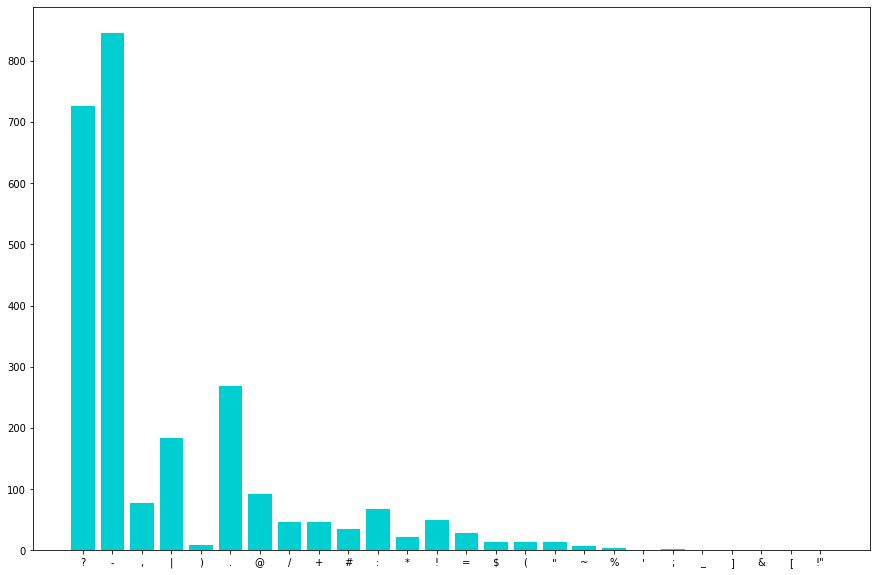

In [25]:
# Punctuations in Neutral sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='darkturquoise')

<BarContainer object of 23 artists>

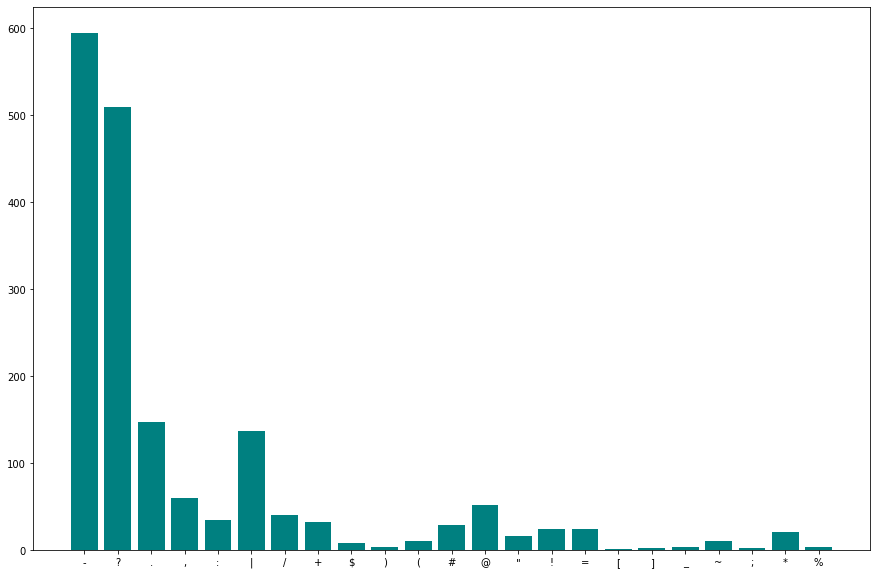

In [26]:
# Punctuations in Negative sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='teal')

# **Data Preprocessing**

**Text Cleaning**

In [27]:
# Making a copy 
twt_df = df.copy()


***A) Removing @user***

In [28]:
# writing function for removing @user
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

***B) Removing url, http, etc-***

In [29]:
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,"Me, ready to go at supermarket during the #COV..."


In [30]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,"Me, ready to go at supermarket during the #COV..."


***C) Remove punctions, words which are not formed letters***

In [31]:
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,Me ready to go at supermarket during the #COVI...


***D) Removing short words***

In [32]:
# remove short words
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #COVID outbreak N...


***E) Creating new variable tokenized tweet***

In [33]:
# create new variable tokenized tweet 
tokenized_tweet = twt_df['Clean_tweet'].apply(lambda x: x.split())
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #COVID outbreak N...


***F) Converting text data to lowercase***

In [34]:
# Creating lower case 
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

***G) Stemming***

In [35]:
# Importing Stemming library
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [36]:
# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty please...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #covid outbreak n...


***H) Tokenization***

In [37]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Clean_tweet'] to tokenized_tweet

In [38]:
twt_df['Clean_tweet']  = tokenized_tweet
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,readi supermarket dure the #covid outbreak not...


# **Story Generation from Tweets**

**Getting major words in every sentiment-**

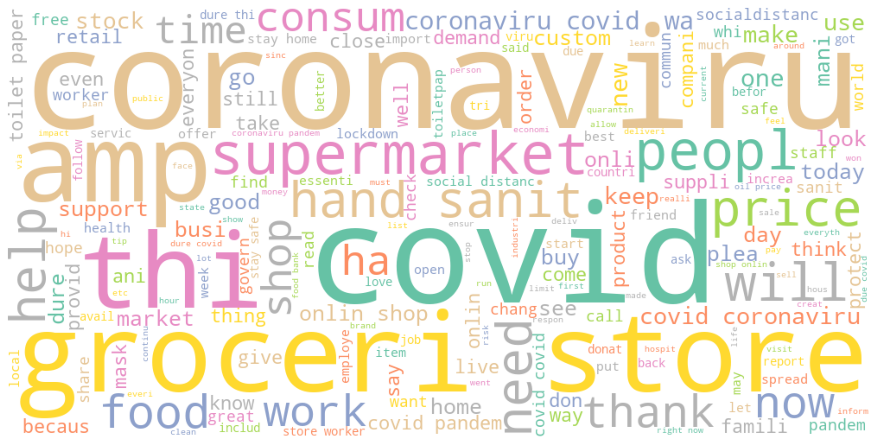

In [39]:
#WordCloud for positive tweets
positive_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Positive']])
wordcloud = WordCloud(width=1000, height=500, background_color ='white',colormap='Set2').generate(positive_tweets)
plt.figure(figsize=(15, 6), facecolor = "white")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

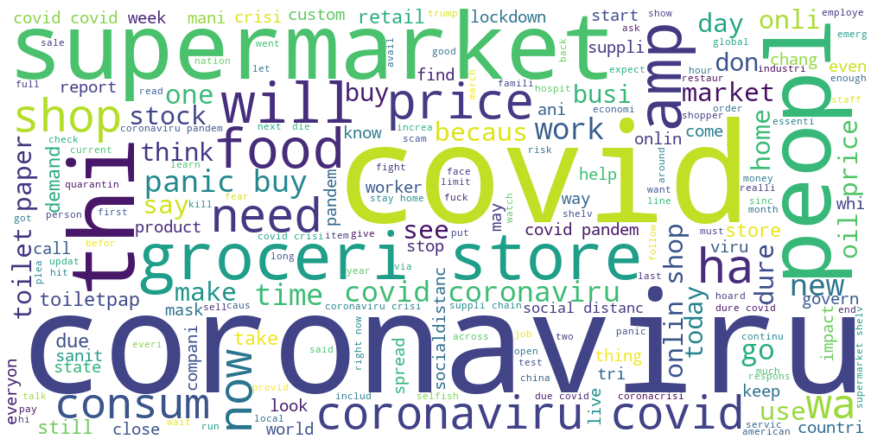

In [40]:
#WordCloud for neutral tweets
neutral_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Neutral']])
wordcloud = WordCloud(width=1000, height=500, background_color ='white').generate(neutral_tweets)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

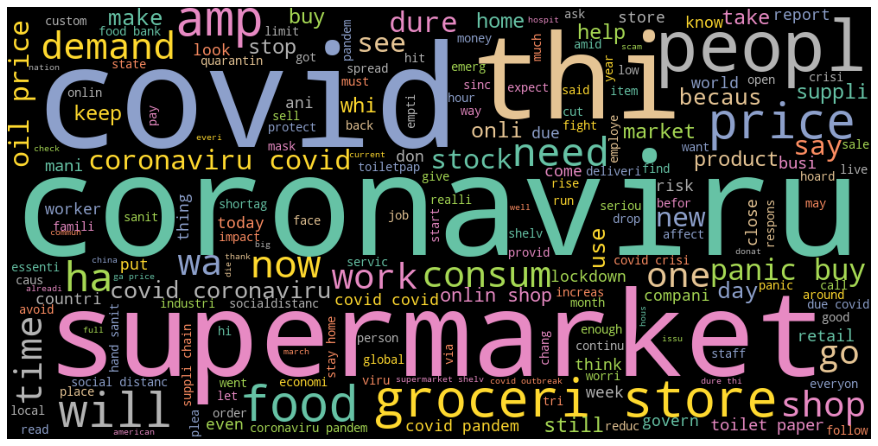

In [41]:
#WordCloud for negative tweets
negative_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Negative']])
wordcloud = WordCloud(width=1000, height=500, background_color ='black',colormap='Set2').generate(negative_tweets)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

* Here we can see the same words repeat in each of the wordcloud like https, coronavirus etc due to the abundance of these words in every tweet.

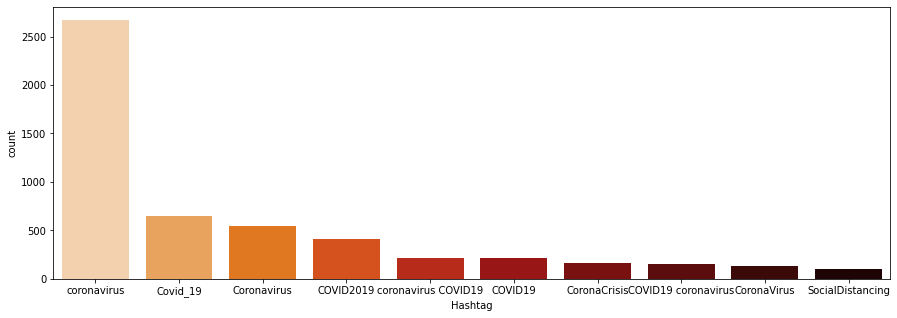

In [42]:
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
twt_df['hash']=twt_df['OriginalTweet'].apply(lambda x:find_hash(x))
temp=twt_df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="Hashtag",y="count", data = temp,palette='gist_heat_r', ax=ax)

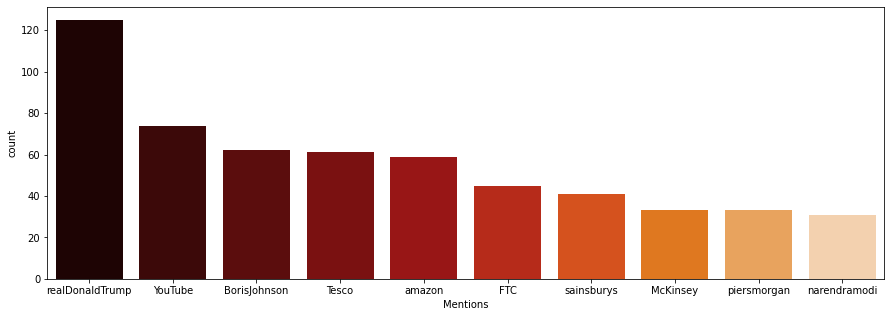

In [43]:
def mentions(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
twt_df['mentions']=twt_df['OriginalTweet'].apply(lambda x:mentions(x))

temp=twt_df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Mentions",y="count", ax=ax, data = temp,palette='gist_heat')

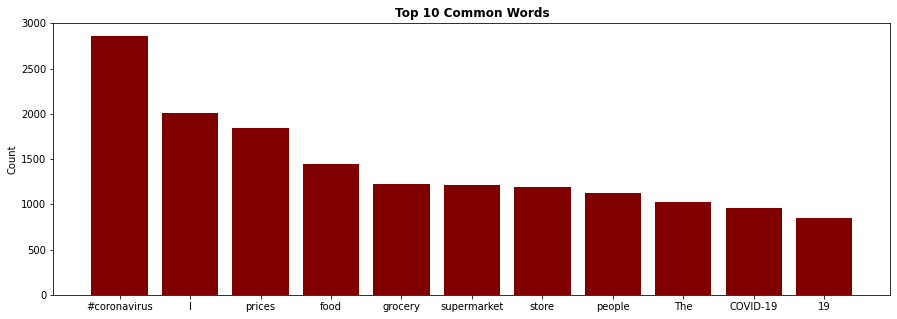

In [44]:
# Barplot for common words
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize = (15,5))
plt.bar(x,y, color='maroon')
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')
plt.show()

# **Required Features**

In [45]:
# Creating new dataframe
tweet_df = twt_df[['Clean_tweet', 'Sentiment']]
tweet_df.head(5)

,Clean_tweet,Sentiment
0,,Neutral
1,advic talk your neighbour famili exchang phone...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock not the onli one which empti pleas ...,Positive
4,readi supermarket dure the #covid outbreak not...,Neutral


# **Feature Engineering**

***Feature encoding***

In [46]:
encoding = {'Negative': 0,
            'Neutral': 1,
            'Positive':2
            }

labels = ['Negative', 'Neutral', 'Positive']
           

tweet_df['Sentiment'].replace(encoding, inplace=True) 

In [47]:
# Checking the updated dataframe
tweet_df.head()

,Clean_tweet,Sentiment
0,,1
1,advic talk your neighbour famili exchang phone...,2
2,coronaviru australia woolworth give elderli di...,2
3,food stock not the onli one which empti pleas ...,2
4,readi supermarket dure the #covid outbreak not...,1


In [48]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clean_tweet  41157 non-null  object
 1   Sentiment    41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [49]:
# Checking shape
tweet_df.shape

(41157, 2)

In [50]:
# Applying stopwards to Clean_tweet column
tweet_df['Clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                       []
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , ...
                               ...                        
41152    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
41153    [r, e, p, n,  , c, p, l, n,  , n,  , p, r, v, ...
41154    [u,  , k, n, w,  , g, e,  , u, g, h,  , w, h, ...
41155    [w, r, n, g,  , h,  , h, e,  , e, l, l,  , h, ...
41156    [w, e, l, l,  , n, e, w,  , u, e,  , r, f,  , ...
Name: Clean_tweet, Length: 41157, dtype: object

In [51]:
# Checking null values
tweet_df.isnull().sum()

Clean_tweet    0
Sentiment      0
dtype: int64

In [52]:
# Null values showing false 
pd.isnull(tweet_df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

In [53]:
# Looking into dataframe
tweet_df.head(5)

,Clean_tweet,Sentiment
0,,1
1,advic talk your neighbour famili exchang phone...,2
2,coronaviru australia woolworth give elderli di...,2
3,food stock not the onli one which empti pleas ...,2
4,readi supermarket dure the #covid outbreak not...,1


***It can be seen there are no nan/null value which means our dataset is clean and is ready for being used for model development.***

# **Spitting Dataset into Training And Testing Dataset ( For Multiclass Classification)**

In [54]:
# Splitting the dataset into training and testing datasets.
train,test = train_test_split(tweet_df,test_size = 0.2,random_state=0,stratify = tweet_df.Sentiment.values)
# Here we stratify, because the dependent variables should be equally distributed among training and testing datasets.

print("train shape : ", train.shape)
print("valid shape : ", test.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# **Counter Vectorizer For Multi Class Classification**

In [55]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform  
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_test = vectorizer.transform(test.Clean_tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_test.shape)

X_train.shape :  (32925, 27134)
X_valid.shape :  (8232, 27134)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# **Naive Bayes Classifier for multiclass**

In [57]:
# MODEL-1 

naiveByes_clf = MultinomialNB()

# Fitting the train & test value
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [58]:
# Predicting the train and test
y_pred_NB_train = naiveByes_clf.predict(X_train)
y_pred_NB_test = naiveByes_clf.predict(X_test)

# Checking accuracy
NB_accuracy = accuracy_score(y_test,y_pred_NB_test)

# Printing the result
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_test,y_test))

Train accuracy Score    :  0.7477600607441154
Test accuracy Score :  0.5965743440233237
              precision    recall  f1-score   support

           0       0.28      0.44      0.35      1261
           1       0.50      0.56      0.53      2335
           2       0.84      0.66      0.74      4636

    accuracy                           0.60      8232
   macro avg       0.54      0.55      0.54      8232
weighted avg       0.66      0.60      0.62      8232



# **Support vector machine**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_prediction)
print("Train accuracy score : ",svm.score(X_train,y_train))
print("Test accuracy score : ",svm_accuracy )
print(classification_report(svm_prediction,y_test))

Train accuracy score :  0.9041761579347001
Test accuracy score :  0.6731049562682215
              precision    recall  f1-score   support

           0       0.31      0.54      0.39      1123
           1       0.74      0.58      0.65      3349
           2       0.83      0.79      0.81      3760

    accuracy                           0.67      8232
   macro avg       0.62      0.64      0.62      8232
weighted avg       0.72      0.67      0.69      8232



# **Logistic Regression**

In [ ]:
logistic = LogisticRegression()

#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


#fit the parameter with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

In [ ]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

In [ ]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_test = grid_lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr_test)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_test,y_test))

# **Stochastic Gradient Descent**

In [62]:
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.678 total time=   0.6s
[CV 2/5] END ..................................., score=0.672 total time=   0.6s
[CV 3/5] END ..................................., score=0.671 total time=   0.5s
[CV 4/5] END ..................................., score=0.676 total time=   0.6s
[CV 5/5] END ..................................., score=0.676 total time=   0.5s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [63]:
y_pred_sgd_train = grid_sgd.predict(X_train)
y_pred_sgd_test = grid_sgd.predict(X_test)

sgd_accuracy = accuracy_score(y_test,y_pred_sgd_test)

print("Train accuracy Score    : ",grid_sgd.score(X_train,y_train))
print("Test accuracy score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_test,y_test))

Train accuracy Score    :  0.8476233864844344
Test accuracy score :  0.6777210884353742
              precision    recall  f1-score   support

           0       0.29      0.50      0.37      1147
           1       0.72      0.59      0.65      3239
           2       0.86      0.81      0.83      3846

    accuracy                           0.68      8232
   macro avg       0.62      0.63      0.62      8232
weighted avg       0.73      0.68      0.69      8232

